![](img/2022-11-22-14-08-30.png)<br>
![](img/2022-11-22-22-34-41.png)

$$
\begin{align}
M_{BC} = EI \frac{d^2y}{dx^2} &= 100x-300\langle x-2 \rangle \tag{1 Moment}\\
EI \frac{dy}{dx} &= 50x^2 - 150\langle x-2 \rangle^2 + C_1 \tag{2 Slope}\\
EIy &= \frac{50x^3}{3} - 50\langle x-2\rangle^3 + C_1x + C_2 \tag{3 Deflection}\\
\end{align}
$$

[สมการโก่งตัว(3)] ที่จุด A ค่าระยะ x=0, การโก่ง y=0, แทน $\langle x-2\rangle^3$ เป็น 0
$$
\begin{align}
  EIy = 0 &= \frac{50(0)^3}{3} - 0 + C_1(0) + C_2 \tag{ref 3} \\
  C_2 &= 0 \notag\\
\end{align}
$$
[สมการโก่งตัว(3)] ที่จุด C ค่าระยะ x=3, การโก่ง y=0
$$
\begin{align}
  EIy = 0 &= \frac{50(3)^3}{3} - 50\langle (3)-2\rangle^3 + C_1(3) \tag{ref 3} \\
  C_1 &= -133 \notag \\
\end{align}
$$

[สมการความชัน(2)] ช่วง AB (0<=x<=2m) , ตัด $-150\langle x-2 \rangle^2$ ออกไป
$$
\begin{align}
EI \frac{dy}{dx} &= 50x^2 - 150\langle x-2 \rangle^2 + C_1 \small \tag{ref 2}\\
EI \frac{dy}{dx} &= 50x^2 -133 \tag{4 Slope}\\
\therefore EIy &= {50x^3 \over 3}  -133x \tag{5}
\end{align}
$$

[สมการความชัน(2)] ช่วง BC (2<=x<=3m)
$$
\begin{align}
EI \frac{dy}{dx} &= 50x^2 -150\langle x-2 \rangle^2 -133 \tag{ref 2}\\
\therefore EIy &= {50x^3 \over 3} -50\langle x-2 \rangle^3 -133x \tag{6}
\end{align}
$$

หาตำแหน่งระยะโก่งตัวสูงสุด $ {dy \over dx} = 0 $
$$
\begin{align}
EI \frac{dy}{dx} &= 50x^2 -133 \tag{ref 4}\\
0 &= 50x^2 -133 \notag\\
\therefore x &= 1.63 \,\mathrm m \notag
\end{align}
$$

เนื่องจาก $x = 1.63$ อยู่ในช่วง AB $(0<=x<=2)$
$$
\begin{align}
EIy &= {50x^3 \over 3}  -133x \tag{ref 5} \\
EIy &= {50(1.63)^3 \over 3}  -133(1.63) = -145 \,\mathrm{N \cdot m^3} \notag \\
\end{align}
$$
ระยะโก่งตัวติดลบ แสดงว่า ระยะโก่งตัว y วัดลงใต้แนวแกน x <br>
ในที่นี้ถ้ากำหนดให้ $E = 10 \times 10^9 \,\mathrm{N \cdot m^2}$ และ $I = 1.5 \times 10^6 \mathrm {mm^4} = 1.5 \times 10^{-6} \mathrm {m^4}$
$$
\begin{align}
(10 \times 10^9)(1.5 \times 10^{-6}) y &= -145 \notag\\
y &= -9.67 \times 10^{-3} \,\mathrm m = -9.67 \,\mathrm {mm} \notag
\end{align}
$$

In [2]:
from sympy import *
from sympy.physics.continuum_mechanics.beam import Beam

L=3
E, I = symbols('E, I')
R1, R2 = symbols('R1, R2')
bm = Beam(L, E, I)
bm.apply_load(R1, 0, -1)
bm.apply_load(R2, L, -1)
bm.apply_load(300, 2, -1)  # P

# find reaction load at A, B
bm.bc_deflection = [(0, 0), (L, 0)]
bm.solve_for_reaction_loads(R1, R2)
bm.reaction_loads

{R1: -100, R2: -200}

In [3]:
bm.deflection()

(400*x/3 - 50*SingularityFunction(x, 0, 3)/3 + 50*SingularityFunction(x, 2, 3) - 100*SingularityFunction(x, 3, 3)/3)/(E*I)

In [4]:
x,y = bm.max_deflection()
x.evalf()

1.63299316185545

In [5]:
y.subs({E:10e9, I:1.5e-6}).evalf()

0.00967699651469897

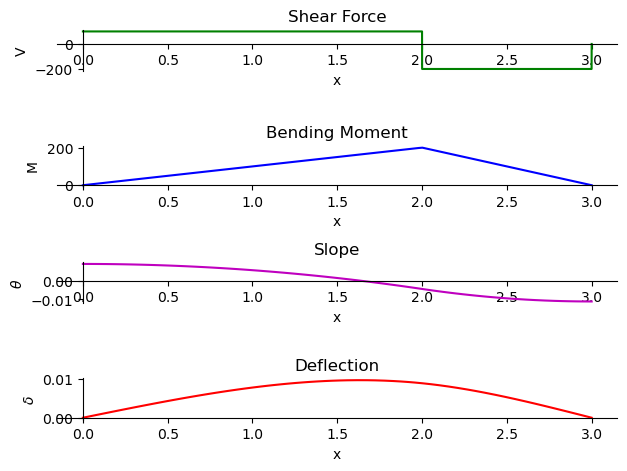

In [11]:
bm.plot_loading_results(subs={E:10e9, I:1.5e-6})